In [1]:
#Need to import different libraries that you will rely on heavily in python (these are usually sufficient)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sm

0
1
2
3
4
5
6
7


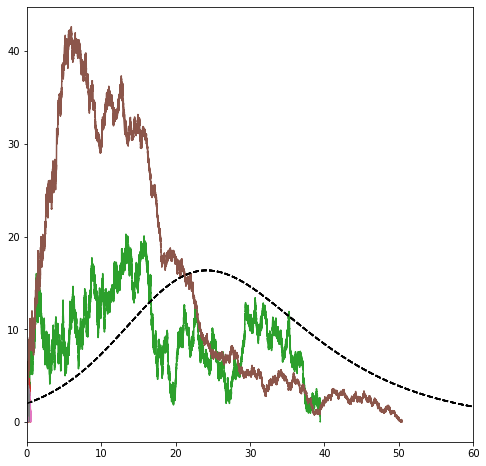

In [321]:
#Linda Allen Stochastic SIR Model in primer paper

#Parameters
N=100
gamma=0.15
beta=0.3
initI=2
initS=N-initI

#Time and timestep
dt=.00005
tmin=0
tmax = 60
t=np.arange(tmin,tmax,dt)

#How many simulations
m=8

#Deterministic Solution
def dXd_dt(x,t):
    return [-(beta*x[0]*x[1]/N), 
            (beta*x[0]*x[1]/N-gamma*x[1])]

X0d=[initS,initI]
Xs=odeint(dXd_dt,X0d,t)

sanswer=Xs[:,0]
ianswer=Xs[:,1]

#Euler Maruyama Stochastic Solution
S=np.zeros(len(t))
I=np.zeros(len(t))

for i in range(m):
    S[0]=initS
    I[0]=initI
    j=0

    #for j in range(len(t)-1): 
    while (I[j]>0 and j<=(len(t)-2)):
        
        r1=np.random.randn()
        r2=np.random.randn()
        
        S[j+1]=S[j]+(-(beta*S[j]*I[j]/N))*dt-(np.sqrt(beta*S[j]*I[j]/N))*r1*np.sqrt(dt)
        I[j+1]=I[j]+(beta*S[j]*I[j]/N-gamma*I[j])*dt+(np.sqrt(beta*S[j]*S[j]/N)*r1-np.sqrt(gamma*I[j])*r2)*np.sqrt(dt)
        j=j+1
 
    plt.plot(t[0:j],I[0:j],t,ianswer,'k--')
    plt.xlim(0,60)